### 1. Khai báo thư viện cần dùng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

### 2. Khởi tạo dữ liệu

In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,51.167815,3.498775,8.872223,24.651297,19.570379
1,35.668804,24.019604,13.426690,9.313608,22.869191
2,59.757207,5.185648,9.291384,4.755899,17.712499
3,57.970050,1.605592,9.717319,17.476248,17.837036
4,44.853240,3.740646,13.068788,4.392477,22.293893


### 3. Trực quan hoá dữ liệu sinh ra 

<AxesSubplot:ylabel='Density'>

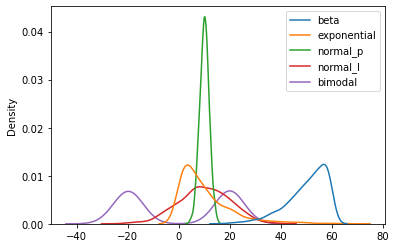

In [5]:
sns.kdeplot(data=df)


### 4. Hiển thị thống kê về dữ liệu sinh ra

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.333498,10.256038,10.022917,9.981066,0.021670
std,7.915569,10.279063,1.860262,9.995523,20.143885
min,18.124969,0.005705,4.021081,-22.792970,-29.157758
25%,46.052171,2.929831,8.818204,3.597283,-19.745621
50%,52.275288,7.101582,10.046092,9.968923,-0.232939
75%,56.701018,14.094862,11.250620,17.163226,19.964575
max,59.999636,67.272577,15.530811,38.306139,30.849036


### 5. Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

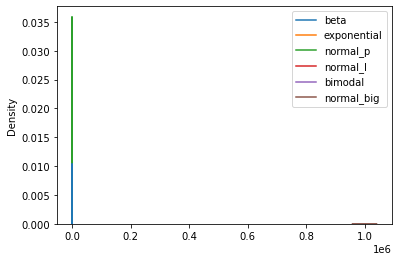

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

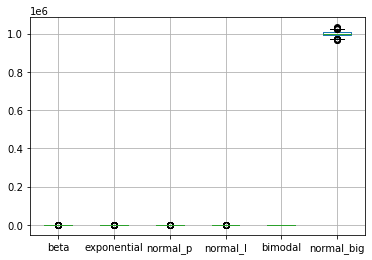

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

### 6. Chuẩn hoá với Robust Scalling

In [10]:
# Khai báo đối tượng MinMaxScaler
scaler = RobustScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-0.103999,-0.322687,-0.482594,1.082297,0.498696,-0.004460
1,-1.559463,1.515269,1.389810,-0.048306,0.581768,-1.315952
2,0.702604,-0.171601,-0.310271,-0.384273,0.451910,0.208612
3,0.534777,-0.492250,-0.135163,0.553395,0.455046,0.624058
4,-0.696981,-0.301023,1.242672,-0.411062,0.567281,0.268302


<AxesSubplot:ylabel='Density'>

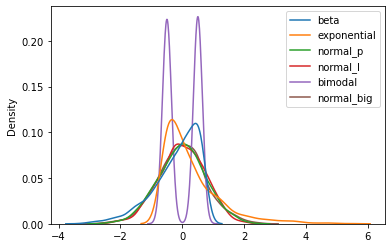

In [13]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [14]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,-0.182347,0.282530,-0.009528,8.950919e-04,0.006412,-3.016381e-03
std,0.743326,0.920648,0.764779,7.368100e-01,0.507272,7.753021e-01
min,-3.206950,-0.635545,-2.476965,-2.415010e+00,-0.728398,-2.626608e+00
25%,-0.584394,-0.373644,-0.504802,-4.696791e-01,-0.491377,-5.077346e-01
50%,0.000000,0.000000,0.000000,6.548581e-17,0.000000,-4.476020e-15
75%,0.415606,0.626356,0.495198,5.303209e-01,0.508623,4.922654e-01
max,0.725369,5.389237,2.254844,2.088850e+00,0.782720,2.522177e+00


<AxesSubplot:>

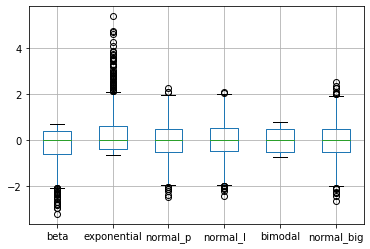

In [15]:
df_s.boxplot()


In [16]:
# lấy các giá trị min ở mỗi cột
mins = [df_s[col].min() for col in df_s.columns]
mins

[-3.2069500885492395,
 -0.63554472916981,
 -2.4769650878534044,
 -2.4150102488671212,
 -0.7283977921990522,
 -2.626607717440873]

In [17]:
# lấy giá trị max ở mỗi cột
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.7253693769675503,
 5.389236751776457,
 2.254843616073005,
 2.08884957156378,
 0.7827202831152555,
 2.522177338530196]

In [18]:
# giá trị trung vị của các đặc trưng của tập dữ liệu gốc
scaler.center_


array([ 5.22752884e+01,  7.10158153e+00,  1.00460922e+01,  9.96892315e+00,
       -2.32939228e-01,  9.99910680e+05])